## Preparação:
- remoção do postgres caso ele já esteja no computador.

In [ ]:

#sudo apt --purge remove 'postgresql*'; sudo apt -y autoremove; sudo apt -y autoclean; sudo rm -rf /var/lib/postgresql/; sudo rm -rf /etc/postgresql/; psql --version

In [ ]:
%%bash
# Parar o serviço do PostgreSQL, caso esteja em execução
sudo systemctl stop postgresql 

# Remover pacotes relacionados ao PostgreSQL
sudo apt --purge remove postgresql*

# Remover pacotes que não são mais necessários
sudo apt autoremove

# Limpar pacotes desnecessários
sudo apt autoclean

# Remover diretórios de dados do PostgreSQL
sudo rm -rf /var/lib/postgresql/

# Remover configurações do PostgreSQL
sudo rm -rf /etc/postgresql/

# Verificar a versão do PostgreSQL instalada (se existir)
psql --version

Lendo listas de pacotes...
Construindo árvore de dependências...
Lendo informação de estado...
O pacote 'postgresql-pgmp' não está instalado, por isso não será removido
O pacote 'postgresql-9.1' não está instalado, por isso não será removido
O pacote 'postgresql-postgis-java' não está instalado, por isso não será removido
O pacote 'postgresql-10-auto-failover' não está instalado, por isso não será removido
O pacote 'postgresql-11-auto-failover' não está instalado, por isso não será removido
O pacote 'postgresql-12-auto-failover' não está instalado, por isso não será removido
O pacote 'postgresql-13-auto-failover' não está instalado, por isso não será removido
O pacote 'postgresql' não está instalado, por isso não será removido
O pacote 'postgresql-client' não está instalado, por isso não será removido
O pacote 'postgresql-doc' não está instalado, por isso não será removido
O pacote 'postgresql-14-asn1oid' não está instalado, por isso não será removido
O pacote 'postgresql-14-auto-failo

Terminado


7                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

- clonagem do repositório, junto dos comandos iniciais

In [4]:
!git clone https://github.com/foliveirafilho/tpch-pgsql.git
!wget -q https://github.com/electrum/tpch-dbgen/archive/32f1c1b92d1664dba542e927d23d86ffa57aa253.zip -O tpch-dbgen.zip
!unzip -q tpch-dbgen.zip && mv tpch-dbgen-32f1c1b92d1664dba542e927d23d86ffa57aa253 tpch-dbgen && rm tpch-dbgen.zip
!mv tpch-dbgen tpch-pgsql

Cloning into 'tpch-pgsql'...
remote: Enumerating objects: 164, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 164 (delta 0), reused 0 (delta 0), pack-reused 160 (from 1)
Receiving objects: 100% (164/164), 774.38 KiB | 1.03 MiB/s, done.
Resolving deltas: 100% (69/69), done.


- reinstalação do postgres

In [5]:
!sudo apt-get install -y postgresql postgresql-contrib


Lendo listas de pacotes... Pronto
Construindo árvore de dependências... Pronto
Lendo informação de estado... Pronto        
Os pacotes adicionais seguintes serão instalados:
  libcommon-sense-perl libjson-perl libjson-xs-perl libllvm14 libpq5
  libtypes-serialiser-perl postgresql-14 postgresql-client-14
  postgresql-client-common postgresql-common
Pacotes sugeridos:
  postgresql-doc postgresql-doc-14
Os NOVOS pacotes a seguir serão instalados:
  libcommon-sense-perl libjson-perl libjson-xs-perl libllvm14 libpq5
  libtypes-serialiser-perl postgresql postgresql-14 postgresql-client-14
  postgresql-client-common postgresql-common postgresql-contrib
0 pacotes atualizados, 12 pacotes novos instalados, 0 a serem removidos e 5 não atualizados.
É preciso baixar 0 B/41,9 MB de arquivos.
Depois desta operação, 160 MB adicionais de espaço em disco serão usados.
Pré-configurando pacotes ...
A seleccionar pacote anteriormente não seleccionado libcommon-sense-perl:amd64.
(Lendo banco de dados ... 32

- verificação das versões

In [3]:
!gcc --version
!python3 --version
!pg_config --version


gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
Copyright (C) 2021 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

Python 3.10.12
PostgreSQL 14.13 (Ubuntu 14.13-0ubuntu0.22.04.1)


## Passo a passo repositório

- instalação do programa 

In [4]:
!pip3 install -r tpch-pgsql/requirements.txt

Defaulting to user installation because normal site-packages is not writeable


- Criação de usuário no postgres

In [6]:
%cd /tmp
!sudo -u postgres createuser tpch
!sudo -u postgres createdb tpchdb
!sudo -u postgres psql -c "ALTER USER tpch WITH ENCRYPTED PASSWORD '1234';"
!sudo -u postgres psql -c "GRANT ALL PRIVILEGES ON DATABASE tpchdb TO tpch;"
!PGPASSWORD=1234 psql -h localhost -p 5432 -d tpchdb -U tpch -c "\l"


/tmp
ALTER ROLE
GRANT
                                  List of databases
   Name    |  Owner   | Encoding |   Collate   |    Ctype    |   Access privileges   
-----------+----------+----------+-------------+-------------+-----------------------
 postgres  | postgres | UTF8     | pt_BR.UTF-8 | pt_BR.UTF-8 | 
 template0 | postgres | UTF8     | pt_BR.UTF-8 | pt_BR.UTF-8 | =c/postgres          +
           |          |          |             |             | postgres=CTc/postgres
 template1 | postgres | UTF8     | pt_BR.UTF-8 | pt_BR.UTF-8 | =c/postgres          +
           |          |          |             |             | postgres=CTc/postgres
 tpchdb    | postgres | UTF8     | pt_BR.UTF-8 | pt_BR.UTF-8 | =Tc/postgres         +
           |          |          |             |             | postgres=CTc/postgres+
           |          |          |             |             | tpch=CTc/postgres
(4 rows)



- rodando o programa (comparar com a versão do jhon)

In [1]:
!python3 tpch_pgsql.py prepare -H localhost -p 5432 -U tpch -W '1234' -d tpchdb 


gcc -g -DDBNAME=\"dss\" -DLINUX -DORACLE -DTPCH -DRNG_TEST -D_FILE_OFFSET_BITS=64   -c -o build.o build.c
gcc -g -DDBNAME=\"dss\" -DLINUX -DORACLE -DTPCH -DRNG_TEST -D_FILE_OFFSET_BITS=64   -c -o driver.o driver.c
driver.c: In function ‘gen_tbl’:
driver.c:368:62: warning: format ‘%ld’ expects argument of type ‘long int’, but argument 3 has type ‘long long int’ []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wformat=-Wformat=]8;;]
  368 |                        printf("\nSeeds for %s at rowcount %ld\n", tdefs[tnum].comment, i);
      |                                                           ~~^                          ~
      |                                                             |                          |
      |                                                             long int                   long long int
      |                                                           %lld
gcc -g -DDBNAME=\"dss\" -DLINUX -DORACLE -DTPCH -DRNG_TEST -D_FILE_OFF

In [1]:
!python3 tpch_pgsql.py load -H localhost -p 5432 -U tpch -W '1234' -d tpchdb
#passo 3

!python3 tpch_pgsql.py query -H localhost -p 5432 -U tpch -W '1234' -d tpchdb
#passo 3

dropped existing tables
cleaned database tpchdb
done creating schemas
done loading data to tables
done creating indexes and foreign keys
=========================== Load ===========================
create_schema: : 0:00:00.053334
load_data: 0:00:33.726051
index_tables: 0:00:27.954245
======================= End Results ========================
Power tests started ...
Power tests finished.
Throughput tests started ...
Throughput tests in stream #1 started ...
Throughput tests in stream #2 started ...
Throughput tests finished.
done performance tests
Power@Size = 3066.4838233492965
Throughput@Size = 3795.3990466743517
QphH@Size = 3411.5289504534826
========================= Metrics ==========================
power_size: 3066.4838233492965
throughput_size: 3795.3990466743517
qphh_size: 3411.5289504534826
======================= End Results ========================


## Tarefa 4: identificação do sistema

In [72]:
!echo "--------------------NOME PROCESS--------------"
!lscpu | grep "Nome"
!echo ""
!echo "---------------RAM------------------"
!free -h # Detalhes sobre a memória RAM tarefa 4
!echo ""
!echo "---------------Disco------------------"
!lsblk -o NAME,SIZE,TYPE | grep "disk" # Detalhes sobre o disco tarefa 4
!echo ""
!echo "---------------cache------------------"
!lscpu | grep -i "cache"  # Cache do processador tarefa 4
!echo ""
!echo "---------------Distro------------------"
!lsb_release -a | grep "Distributor" # Detalhes da distribuição e versão do Linux tarefa 4
!echo ""
!echo "---------------SO e Kernel------------------"
!uname -a # Informações sobre o Sistema Operacional e Kernel tarefa 4

--------------------NOME PROCESS--------------


Nome do modelo:                       12th Gen Intel(R) Core(TM) i5-12450H

---------------RAM------------------
               total       usada       livre    compart.  buff/cache  disponível
Mem.:          7,5Gi       2,9Gi       728Mi       859Mi       3,8Gi       3,3Gi
Swap:          2,0Gi       1,1Gi       928Mi

---------------Disco------------------
nvme0n1     238,5G disk

---------------cache------------------
cache de L1d:                         320 KiB (8 instances)
cache de L1i:                         384 KiB (8 instances)
cache de L2:                          7 MiB (5 instances)
cache de L3:                          12 MiB (1 instance)

---------------Distro------------------
No LSB modules are available.
Distributor ID:	Zorin

---------------SO e Kernel------------------
Linux Mengo 6.8.0-48-generic #48~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Mon Oct  7 11:24:13 UTC 2 x86_64 x86_64 x86_64 GNU/Linux


## Tarefa 5:Verificação de Parâmetros de Armazenamento (Adaptada para SSD)


In [73]:
!echo "---------------Capacidade Disco------------------"
!lsblk -o NAME,SIZE,TYPE | grep "disk" 

---------------Capacidade Disco------------------
nvme0n1     238,5G disk


In [ ]:
!sudo apt-get install smartmontools 
#programa para rodar o próximo comando


In [52]:
# Verificando informações de latência do SSD usando smartctl
!sudo smartctl -a /dev/nvme0n1 #mudar o /dev/... pelo nome do ssd do computador

smartctl 7.2 2020-12-30 r5155 [x86_64-linux-6.8.0-48-generic] (local build)
Copyright (C) 2002-20, Bruce Allen, Christian Franke, www.smartmontools.org

=== START OF INFORMATION SECTION ===
Model Number:                       SM2P41C8-256GC1
Serial Number:                      KO022L1KKNGD
Firmware Version:                   V1223C0
PCI Vendor/Subsystem ID:            0x1cc1
IEEE OUI Identifier:                0x707c18
Total NVM Capacity:                 256.060.514.304 [256 GB]
Unallocated NVM Capacity:           0
Controller ID:                      1
NVMe Version:                       1.4
Number of Namespaces:               1
Namespace 1 Size/Capacity:          256.060.514.304 [256 GB]
Namespace 1 Formatted LBA Size:     512
Namespace 1 IEEE EUI-64:            707c18 0002020100
Local Time is:                      Mon Nov 11 15:52:42 2024 -04
Firmware Updates (0x16):            3 Slots, no Reset required
Optional Admin Commands (0x0017):   Security Format Frmw_DL Self_Test
Optional 

In [32]:
# Taxa de transferência de leitura do SSD
!sudo hdparm -tT /dev/nvme0n1



/dev/nvme0n1:
 Timing cached reads:   10272 MB in  2.00 seconds = 5142.22 MB/sec
 Timing buffered disk reads: 3318 MB in  3.00 seconds = 1105.80 MB/sec


In [33]:
# Verificando a vida útil (TBW) do SSD
!sudo smartctl -A /dev/nvme0n1 | grep "Data Units Written"


Data Units Written:                 4.781.530 [2,44 TB]


In [ ]:
# Tipo de memória utilizada no SSD (se disponível)
!sudo smartctl -i /dev/nvme0n1
#ultima 5. a)

smartctl 7.2 2020-12-30 r5155 [x86_64-linux-6.8.0-48-generic] (local build)
Copyright (C) 2002-20, Bruce Allen, Christian Franke, www.smartmontools.org

=== START OF INFORMATION SECTION ===
Model Number:                       SM2P41C8-256GC1
Serial Number:                      KO022L1KKNGD
Firmware Version:                   V1223C0
PCI Vendor/Subsystem ID:            0x1cc1
IEEE OUI Identifier:                0x707c18
Total NVM Capacity:                 256.060.514.304 [256 GB]
Unallocated NVM Capacity:           0
Controller ID:                      1
NVMe Version:                       1.4
Number of Namespaces:               1
Namespace 1 Size/Capacity:          256.060.514.304 [256 GB]
Namespace 1 Formatted LBA Size:     512
Namespace 1 IEEE EUI-64:            707c18 0002020100
Local Time is:                      Mon Nov 11 15:22:11 2024 -04



In [43]:
# Verificando o modo de leitura e gravação do SSD usando hdparm
!sudo hdparm /dev/nvme0n1 



/dev/nvme0n1:
 readonly      =  0 (off)
 readahead     = 256 (on)
 geometry      = 244198/64/32, sectors = 500118192, start = 0


In [45]:
# Verificando a ativação do TRIM no SSD usando smartctl
!sudo smartctl -i /dev/nvme0n1 | grep "TRIM"


In [48]:

# Verificar TRIM usando hdparm
!sudo hdparm -I /dev/nvme0n1 | grep "TRIM"

### Tarefa 6


### Análise do Armazenamento Físico de Dados no PostgreSQL

O PostgreSQL organiza seus dados de forma complexa, distribuindo-os em diversos tipos de arquivos e diretórios, cada um com uma função específica. Abaixo estão os principais conceitos e detalhes da estrutura de armazenamento físico do PostgreSQL:

#### 1. Estrutura de Diretórios e Arquivos
- **Base Directory (`/data/base/`)**: Contém um diretório para cada banco de dados.
- **Tabelas e Índices**: Cada tabela e índice é armazenado em arquivos dedicados, divididos em blocos de 8 KB.
- **pg_xact**: Armazena os arquivos de controle de transações (status de commit/rollback).
- **pg_wal**: Contém os arquivos de logs WAL (Write-Ahead Logging), essenciais para a recuperação em caso de falhas.

#### 2. Estrutura Interna dos Arquivos
- **Páginas de Dados**: Os dados são armazenados em páginas de 8 KB. Cada página contém um cabeçalho, metadados e espaço para os registros da tabela.
- **Tabelas TOAST (The Oversized-Attribute Storage Technique)**: Armazena colunas com dados grandes que excedem o limite de tamanho das páginas, como texto muito longo e BLOBs.

#### 3. Gerenciamento de Espaço
- **MVCC (Multiversion Concurrency Control)**: Através do MVCC, o PostgreSQL armazena várias versões das linhas nas tabelas, o que garante isolação das transações.
- **Autovacuum**: Um processo que limpa as linhas que não estão mais em uso, ajudando a reduzir o espaço ocupado e a melhorar o desempenho.

### Tabela Comparativa das Características de Armazenamento do PostgreSQL

| Característica                        | Descrição                                                                                                                                                          |
|--------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Blocos de Dados**                  | Dados armazenados em blocos de 8 KB, que contém linhas e cabeçalhos de controle.                                                                                   |
| **MVCC**                             | Usa MVCC para controlar versões de linhas, permitindo maior concorrência entre transações.                                                                         |
| **Tabelas TOAST**                    | Armazenam dados grandes fora da tabela principal quando excedem o limite de tamanho do bloco.                                                                      |
| **WAL (Write-Ahead Logging)**        | Logs de transações usados para recuperação de falhas e consistência.                                                                                               |
| **Autovacuum**                       | Limpeza automática das linhas obsoletas e manutenção de índices.                                                                                                   |
| **pg_xact**                          | Armazena o status das transações para verificação de consistência.                                                                                                 |
| **Estrutura de Índices**             | Índices armazenados em arquivos separados, utilizados para acesso rápido às linhas.                                                                               |
| **Configurações de Armazenamento**   | Permite ajuste de parâmetros como o tamanho do bloco, políticas de autovacuum e tamanho do WAL.                                                                    |

### Diagrama da Estrutura de Armazenamento

Vamos criar um diagrama básico da estrutura de armazenamento físico do PostgreSQL usando `matplotlib` e `graphviz`.




### Comparação entre Sistemas de Arquivos: Ext2, Ext3, ReiserFS e XFS

Existem vários sistemas de arquivos disponíveis para Linux, cada um com suas características e vantagens. Vamos comparar os seguintes sistemas de arquivos: **Ext2**, **Ext3**, **ReiserFS** e **XFS**.

#### 1. **Ext2 (Second Extended File System)**
- **Introdução**: Lançado em 1993, o Ext2 foi o sistema de arquivos padrão do Linux por um bom tempo. Ele é conhecido por sua simplicidade e eficiência.
- **Características**:
  - Não possui journaling (não mantém um log de transações), o que significa que pode ser mais rápido para operações de leitura e escrita.
  - Menos resiliente a falhas, pois não há registro de transações.

#### 2. **Ext3 (Third Extended File System)**
- **Introdução**: Lançado em 2001, o Ext3 é uma evolução do Ext2 com suporte a journaling.
- **Características**:
  - Implementa journaling, o que melhora a recuperação após falhas.
  - Compatível com Ext2 (pode ser montado como Ext2 sem perder dados).
  - Mais seguro, mas com desempenho um pouco inferior ao Ext2.

#### 3. **ReiserFS**
- **Introdução**: Lançado em 2001, o ReiserFS foi projetado para ser eficiente em ambientes com grandes volumes de pequenos arquivos.
- **Características**:
  - Suporta journaling.
  - Melhor desempenho em determinadas cargas de trabalho, especialmente para arquivos pequenos.
  - Não tão amplamente suportado quanto Ext3 e XFS.

#### 4. **XFS**
- **Introdução**: XFS é um sistema de arquivos de alto desempenho lançado originalmente pela Silicon Graphics em 1994.
- **Características**:
  - Suporta journaling e é otimizado para grandes volumes de dados.
  - Muito bom para sistemas com grandes arquivos e alto desempenho.
  - Suporta redimensionamento dinâmico e é frequentemente usado em servidores de alto desempenho.

### Tabela Comparativa das Características

| Característica                  | Ext2                                  | Ext3                                 | ReiserFS                            | XFS                                 |
|----------------------------------|---------------------------------------|--------------------------------------|-------------------------------------|-------------------------------------|
| **Lançamento**                   | 1993                                  | 2001                                 | 2001                                | 1994                                |
| **Journaling**                    | Não                                   | Sim                                  | Sim                                 | Sim                                 |
| **Desempenho em Arquivos Pequenos**| Bom                                   | Bom                                  | Excelente                           | Bom                                 |
| **Desempenho em Arquivos Grandes**| Médio                                 | Médio                                | Médio                               | Excelente                           |
| **Resiliência a Falhas**          | Baixa (sem journaling)               | Alta (com journaling)               | Alta (com journaling)              | Alta (com journaling)              |
| **Capacidade de Escalabilidade**  | Limitada                              | Limitada                             | Boa                                 | Excelente                           |
| **Compatibilidade com Ext2**      | N/A                                   | Totalmente compatível               | Não                                  | Não                                  |
| **Suporte a Redimensionamento**   | Não                                   | Não                                  | Não                                 | Sim                                 |
| **Usos Comuns**                   | Sistemas pequenos, particionamento simples | Servidores e sistemas críticos      | Sistemas com muitos arquivos pequenos | Servidores com grandes volumes de dados |
| **Suporte Atual**                 | Descontinuado                        | Suporte contínuo                    | Suporte limitado                    | Suporte contínuo                    |

### Diagrama da Arquitetura de Sistemas de Arquivos

Podemos ilustrar a diferença entre os sistemas de arquivos com base no uso de journaling e nas características de desempenho.




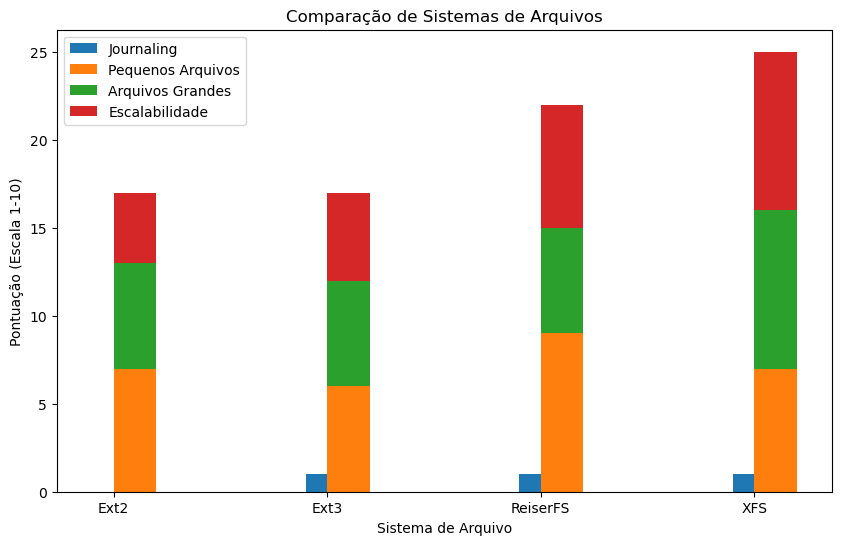

In [3]:
import matplotlib.pyplot as plt

# Dados do gráfico
labels = ['Ext2', 'Ext3', 'ReiserFS', 'XFS']
journaling = [0, 1, 1, 1]
performance_small_files = [7, 6, 9, 7]
performance_large_files = [6, 6, 6, 9]
scalability = [4, 5, 7, 9]

# Criando o gráfico
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(labels, journaling, width=0.2, label='Journaling', align='center')
ax.bar(labels, performance_small_files, width=0.2, label='Pequenos Arquivos', align='edge')
ax.bar(labels, performance_large_files, width=0.2, label='Arquivos Grandes', align='edge', bottom=performance_small_files)
ax.bar(labels, scalability, width=0.2, label='Escalabilidade', align='edge', bottom=[i+j for i,j in zip(performance_small_files, performance_large_files)])

# Adicionando títulos e rótulos
ax.set_title('Comparação de Sistemas de Arquivos')
ax.set_ylabel('Pontuação (Escala 1-10)')
ax.set_xlabel('Sistema de Arquivo')

ax.legend()

plt.show()

## parte 3

### tarefa 9

In [2]:
# Usando o terminal para executar comandos SQL no PostgreSQL
%cd /tmp
!sudo -u postgres psql -c "DROP TABLE IF EXISTS t;"
!sudo -u postgres psql -c "CREATE TABLE t (k serial PRIMARY KEY, v integer);"
!sudo -u postgres psql -c "INSERT INTO t(v) SELECT trunc(random() * 10) FROM generate_series(1,100000);"



/tmp
NOTICE:  table "t" does not exist, skipping
DROP TABLE
CREATE TABLE
INSERT 0 100000


In [3]:
# Executa o comando SQL para selecionar as primeiras 10 tuplas, ordenadas por k
!sudo -u postgres psql -c "SELECT * FROM t ORDER BY k LIMIT 10;"

 k  | v 
----+---
  1 | 4
  2 | 2
  3 | 1
  4 | 5
  5 | 3
  6 | 5
  7 | 1
  8 | 5
  9 | 8
 10 | 4
(10 rows)



### tarefa 10

In [11]:
# Consulta o número de páginas de blocos e de tuplas da tabela 't'
!sudo -u postgres psql -c "SELECT relname, relpages, reltuples FROM pg_class WHERE relname='t';"


could not change directory to "/home/zico/.local/share/Trash/files/tpch-pgsql": Permissão negada
 relname | relpages | reltuples 
---------+----------+-----------
 t       |      443 |    100000
(1 row)



### tarefa 11

In [15]:
%%bash
sudo -u postgres psql -v ON_ERROR_STOP=1 <<EOF
\pset x on
SELECT pg_sleep(1);
SELECT * FROM pg_stats WHERE tablename='t';
SELECT pg_stat_reset();
\pset x off
EOF


could not change directory to "/home/zico/.local/share/Trash/files/tpch-pgsql": Permissão negada


Expanded display is on.
-[ RECORD 1 ]
pg_sleep | 

-[ RECORD 1 ]----------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
schemaname             | public
tablename              | t
attname                | k
inherited              | f
null_frac              | 0
avg_width              | 4
n_distinct             | -1
most_common_vals       | 
most_common_freqs      | 
histogram_bounds       | {8,1005,1923,2921,4000,5034,6021,7065,8025,9026,9981,11024

### tarefa 12

In [6]:
%%bash
sudo -u postgres psql <<EOF
\pset x on
\timing

-- Criar índice
CREATE INDEX idx_v ON t(v);

-- Executar a consulta e medir o tempo
SELECT * FROM t WHERE v = 5;

-- Mostrar o plano de execução e análise
EXPLAIN ANALYZE SELECT * FROM t WHERE v = 5;

EOF


Expanded display is on.
Timing is on.


ERROR:  relation "idx_v" already exists


Time: 1,077 ms
-[ RECORD 1 ]
k | 4
v | 5
-[ RECORD 2 ]
k | 6
v | 5
-[ RECORD 3 ]
k | 8
v | 5
-[ RECORD 4 ]
k | 19
v | 5
-[ RECORD 5 ]
k | 29
v | 5
-[ RECORD 6 ]
k | 32
v | 5
-[ RECORD 7 ]
k | 33
v | 5
-[ RECORD 8 ]
k | 34
v | 5
-[ RECORD 9 ]
k | 42
v | 5
-[ RECORD 10 ]
k | 45
v | 5
-[ RECORD 11 ]
k | 46
v | 5
-[ RECORD 12 ]
k | 62
v | 5
-[ RECORD 13 ]
k | 73
v | 5
-[ RECORD 14 ]
k | 99
v | 5
-[ RECORD 15 ]
k | 108
v | 5
-[ RECORD 16 ]
k | 113
v | 5
-[ RECORD 17 ]
k | 142
v | 5
-[ RECORD 18 ]
k | 144
v | 5
-[ RECORD 19 ]
k | 146
v | 5
-[ RECORD 20 ]
k | 160
v | 5
-[ RECORD 21 ]
k | 167
v | 5
-[ RECORD 22 ]
k | 194
v | 5
-[ RECORD 23 ]
k | 200
v | 5
-[ RECORD 24 ]
k | 224
v | 5
-[ RECORD 25 ]
k | 231
v | 5
-[ RECORD 26 ]
k | 259
v | 5
-[ RECORD 27 ]
k | 264
v | 5
-[ RECORD 28 ]
k | 273
v | 5
-[ RECORD 29 ]
k | 293
v | 5
-[ RECORD 30 ]
k | 295
v | 5
-[ RECORD 31 ]
k | 331
v | 5
-[ RECORD 32 ]
k | 338
v | 5
-[ RECORD 33 ]
k | 344
v | 5
-[ RECORD 34 ]
k | 345
v | 5
-[ RECORD 35 ]
k | 378
v 

### Remover a tabela existente e criar novamente com 1.000.000 de tuplas



In [7]:
%%bash
sudo -u postgres psql <<EOF
\pset x on
\timing

-- Remover a tabela existente
DROP TABLE IF EXISTS t;

-- Criar a tabela com 1.000.000 de tuplas
CREATE TABLE t (k serial PRIMARY KEY, v integer);

-- Inserir 1.000.000 de tuplas com valores aleatórios entre 0 e 10
INSERT INTO t(v)
SELECT trunc(random() * 10) FROM generate_series(1, 1000000);

EOF


Expanded display is on.
Timing is on.
DROP TABLE
Time: 5,346 ms
CREATE TABLE
Time: 4,815 ms
INSERT 0 1000000
Time: 3425,078 ms (00:03,425)


### Medir o tempo para realizar uma consulta para um valor específico

In [ ]:

%%bash
sudo -u postgres psql <<EOF
\timing

-- Consulta para medir o tempo sem retornar as tuplas
SELECT COUNT(*) FROM t WHERE v = 5;

EOF


bash: linha 1: fg: nenhum controle de trabalho
could not change directory to "/home/zico/Documentos/ufam/bd/bd/tp3/tpch-pgsql": Permissão negada


Timing is on.
 count  
--------
 100017
(1 row)

Time: 68,643 ms


In [4]:
%%bash
sudo -u postgres psql <<EOF
\timing

-- Remover o índice existente, caso exista
DROP INDEX IF EXISTS idx_v;

-- Recriar o índice
CREATE INDEX idx_v ON t(v);

EOF

could not change directory to "/home/zico/Documentos/ufam/bd/bd/tp3/tpch-pgsql": Permissão negada


Timing is on.


NOTICE:  index "idx_v" does not exist, skipping


DROP INDEX
Time: 0,575 ms
CREATE INDEX
Time: 710,348 ms


In [5]:
%cd /tmp
!sudo -u postgres psql -c "DROP TABLE IF EXISTS t;"
!sudo -u postgres psql -c "CREATE TABLE t (k serial PRIMARY KEY, v integer);"
!sudo -u postgres psql -c "INSERT INTO t(v) SELECT trunc(random() * 10)  FROM generate_series(1,100000);"

/tmp
DROP TABLE
CREATE TABLE
INSERT 0 100000


## Tarefa 13

### Criar novos índices com diferentes valores de fillfactor

In [6]:
%%bash
sudo -u postgres psql <<EOF
\timing
\pset x on

-- Remover índices existentes, se houver
DROP INDEX IF EXISTS idx_v;

-- Criar índice com fillfactor = 60
CREATE INDEX idx_v_60 ON t(v) WITH (fillfactor = 60);

-- Criar índice com fillfactor = 80
CREATE INDEX idx_v_80 ON t(v) WITH (fillfactor = 80);

-- Criar índice com fillfactor = 90
CREATE INDEX idx_v_90 ON t(v) WITH (fillfactor = 90);

-- Criar índice com fillfactor = 100
CREATE INDEX idx_v_100 ON t(v) WITH (fillfactor = 100);

EOF


Timing is on.
Expanded display is on.


NOTICE:  index "idx_v" does not exist, skipping


DROP INDEX
Time: 0,412 ms
CREATE INDEX
Time: 107,666 ms
CREATE INDEX
Time: 99,177 ms
CREATE INDEX
Time: 85,645 ms
CREATE INDEX
Time: 107,248 ms


### Analisar o desempenho das consultas para cada índice

In [7]:
%%bash
sudo -u postgres psql <<EOF
\timing

-- Usar o índice com fillfactor = 60
DROP INDEX IF EXISTS idx_v;
CREATE INDEX idx_v ON t(v) WITH (fillfactor = 60);
SELECT COUNT(*) FROM t WHERE v = 5;

-- Usar o índice com fillfactor = 80
DROP INDEX IF EXISTS idx_v;
CREATE INDEX idx_v ON t(v) WITH (fillfactor = 80);
SELECT COUNT(*) FROM t WHERE v = 5;

-- Usar o índice com fillfactor = 90
DROP INDEX IF EXISTS idx_v;
CREATE INDEX idx_v ON t(v) WITH (fillfactor = 90);
SELECT COUNT(*) FROM t WHERE v = 5;

-- Usar o índice com fillfactor = 100
DROP INDEX IF EXISTS idx_v;
CREATE INDEX idx_v ON t(v) WITH (fillfactor = 100);
SELECT COUNT(*) FROM t WHERE v = 5;

EOF


Timing is on.


NOTICE:  index "idx_v" does not exist, skipping


DROP INDEX
Time: 0,430 ms
CREATE INDEX
Time: 104,917 ms
 count 
-------
 10137
(1 row)

Time: 2,461 ms
DROP INDEX
Time: 1,450 ms
CREATE INDEX
Time: 110,683 ms
 count 
-------
 10137
(1 row)

Time: 1,388 ms
DROP INDEX
Time: 1,074 ms
CREATE INDEX
Time: 100,486 ms
 count 
-------
 10137
(1 row)

Time: 1,571 ms
DROP INDEX
Time: 1,202 ms
CREATE INDEX
Time: 140,563 ms
 count 
-------
 10137
(1 row)

Time: 1,903 ms


| Fillfactor | Tempo Criação Índice (ms) | Tempo Consulta (ms) |
|------------|---------------------------|---------------------|
| 60         | 104,917                   | 2,461               |
| 80         | 110,683                   | 1,388               |
| 90         | 100,486                   | 1,571               |
| 100        | 140,563                   | 1,903               |


In [8]:
%cd /tmp
!sudo -u postgres psql -c "DROP TABLE IF EXISTS t;"
!sudo -u postgres psql -c "CREATE TABLE t (k serial PRIMARY KEY, v integer);"
!sudo -u postgres psql -c "INSERT INTO t(v) SELECT trunc(random() * 10)  FROM generate_series(1,100000);"

/tmp
DROP TABLE
CREATE TABLE
INSERT 0 100000


## Tarefa 15

### Criar índice com ordem descendente

In [9]:
%%bash
sudo -u postgres psql <<EOF
\timing
\pset x on

-- Remover índices existentes
DROP INDEX IF EXISTS idx_v_desc;

-- Criar índice com fillfactor = 60 e ordem descendente
CREATE INDEX idx_v_desc_60 ON t(v DESC NULLS FIRST) WITH (fillfactor = 60);

-- Criar índice com fillfactor = 80 e ordem descendente
CREATE INDEX idx_v_desc_80 ON t(v DESC NULLS FIRST) WITH (fillfactor = 80);

-- Criar índice com fillfactor = 90 e ordem descendente
CREATE INDEX idx_v_desc_90 ON t(v DESC NULLS FIRST) WITH (fillfactor = 90);

-- Criar índice com fillfactor = 100 e ordem descendente
CREATE INDEX idx_v_desc_100 ON t(v DESC NULLS FIRST) WITH (fillfactor = 100);

EOF


Timing is on.
Expanded display is on.


NOTICE:  index "idx_v_desc" does not exist, skipping


DROP INDEX
Time: 0,587 ms
CREATE INDEX
Time: 120,993 ms
CREATE INDEX
Time: 104,707 ms
CREATE INDEX
Time: 104,639 ms
CREATE INDEX
Time: 154,824 ms


In [10]:
%%bash
sudo -u postgres psql <<EOF
\timing

-- Usar índice descendente com fillfactor = 60
DROP INDEX IF EXISTS idx_v_desc;
CREATE INDEX idx_v_desc ON t(v DESC NULLS FIRST) WITH (fillfactor = 60);
SELECT COUNT(*) FROM t WHERE v = 5;

-- Usar índice descendente com fillfactor = 80
DROP INDEX IF EXISTS idx_v_desc;
CREATE INDEX idx_v_desc ON t(v DESC NULLS FIRST) WITH (fillfactor = 80);
SELECT COUNT(*) FROM t WHERE v = 5;

-- Usar índice descendente com fillfactor = 90
DROP INDEX IF EXISTS idx_v_desc;
CREATE INDEX idx_v_desc ON t(v DESC NULLS FIRST) WITH (fillfactor = 90);
SELECT COUNT(*) FROM t WHERE v = 5;

-- Usar índice descendente com fillfactor = 100
DROP INDEX IF EXISTS idx_v_desc;
CREATE INDEX idx_v_desc ON t(v DESC NULLS FIRST) WITH (fillfactor = 100);
SELECT COUNT(*) FROM t WHERE v = 5;

EOF


Timing is on.


NOTICE:  index "idx_v_desc" does not exist, skipping


DROP INDEX
Time: 0,360 ms
CREATE INDEX
Time: 121,106 ms
 count 
-------
 10054
(1 row)

Time: 3,007 ms
DROP INDEX
Time: 2,130 ms
CREATE INDEX
Time: 115,269 ms
 count 
-------
 10054
(1 row)

Time: 1,919 ms
DROP INDEX
Time: 1,223 ms
CREATE INDEX
Time: 114,469 ms
 count 
-------
 10054
(1 row)

Time: 2,255 ms
DROP INDEX
Time: 1,688 ms
CREATE INDEX
Time: 143,591 ms
 count 
-------
 10054
(1 row)

Time: 2,025 ms


| Fillfactor | Tipo de Índice    | Tempo Criação Índice (ms) | Tempo Consulta (ms) |
|------------|-------------------|---------------------------|---------------------|
| 60         | Descendente       | 121,106                  | 3,007               |
| 80         | Descendente       | 115,269                  | 1,919               |
| 90         | Descendente       | 114,469                  | 2,255               |
| 100        | Descendente       | 143,591                  | 2,025               |


## Tarefa 16

### a)

In [1]:
%cd /tmp
!sudo -u postgres psql -c "CREATE DATABASE moviesDB;"


/tmp
CREATE DATABASE


In [2]:
%%bash
cat movie.sql | sudo -u postgres psql -d moviesdb
cat casting.sql | sudo -u postgres psql -d moviesdb
cat actor.sql | sudo -u postgres psql -d moviesdb


could not change directory to "/home/zico/Documentos/ufam/bd/bd/tp3": Permissão negada
ERROR:  table "movie" does not exist


CREATE TABLE
CREATE INDEX
CREATE INDEX
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSE

could not change directory to "/home/zico/Documentos/ufam/bd/bd/tp3": Permissão negada
ERROR:  table "casting" does not exist


COMMIT
CREATE TABLE
CREATE INDEX
CREATE INDEX
CREATE INDEX
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT

could not change directory to "/home/zico/Documentos/ufam/bd/bd/tp3": Permissão negada
ERROR:  table "actor" does not exist


INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1

In [6]:
!pip install pandas


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 506.5 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 511.2 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 KB 397.2 kB/s eta 0:00:001m386.6 kB/s eta 0:00:01


In [3]:
import psycopg2
import pandas as pd

# Conexão com a base de dados moviesdb
conn = psycopg2.connect(
    dbname="moviesdb",
    user="tpch",
    host="localhost",
    password="1234"  # Substitua pela senha correta se necessário.
)

# Query para obter metadados sobre os índices
query = """
SELECT
    c2.relname AS index_name,
    c1.relname AS table_name,
    pg_relation_size(pg_index.indexrelid) AS index_size,
    am.amname AS index_type,
    pg_index.indnatts AS num_columns,
    pg_index.indisunique AS is_unique,
    pg_index.indisprimary AS is_primary,
    pg_indexes.indexdef AS index_definition
FROM 
    pg_index
JOIN 
    pg_class c1 ON c1.oid = pg_index.indrelid
JOIN 
    pg_class c2 ON c2.oid = pg_index.indexrelid
JOIN 
    pg_am am ON am.oid = c2.relam
JOIN 
    pg_indexes ON pg_indexes.indexname = c2.relname
WHERE 
    c1.relname IN (SELECT tablename FROM pg_tables WHERE schemaname = 'public');

"""

# Executar a query e carregar os resultados em um DataFrame Pandas
df = pd.read_sql_query(query, conn)

# Fechar a conexão
conn.close()

# Exibir os resultados
df


/tmp/ipykernel_6140/3973400658.py:39: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


,index_name,table_name,index_size,index_type,num_columns,is_unique,is_primary,index_definition
0,movie_key,movie,57344,btree,1,True,True,CREATE UNIQUE INDEX movie_key ON public.movie ...
1,movie_title,movie,98304,btree,1,False,False,CREATE INDEX movie_title ON public.movie USING...
2,movie_votes,movie,90112,btree,1,False,False,CREATE INDEX movie_votes ON public.movie USING...
3,casting_movie,casting,221184,btree,1,False,False,CREATE INDEX casting_movie ON public.casting U...
4,casting_actor,casting,270336,btree,1,False,False,CREATE INDEX casting_actor ON public.casting U...
5,casting_ord,casting,163840,btree,1,False,False,CREATE INDEX casting_ord ON public.casting USI...
6,actor_id,actor,155648,btree,1,False,False,CREATE INDEX actor_id ON public.actor USING bt...


## Tarefa 17

### a)

In [1]:
%cd /tmp

!sudo -u postgres psql -c "GRANT ALL PRIVILEGES ON DATABASE moviesdb TO tpch;"

/tmp
GRANT


In [6]:
%%bash
sudo -u postgres psql -d moviesdb -c "EXPLAIN (ANALYZE, BUFFERS) SELECT * FROM MOVIE WHERE VOTES < 10 LIMIT 10;"


                                                        QUERY PLAN                                                        
--------------------------------------------------------------------------------------------------------------------------
 Limit  (cost=0.28..4.30 rows=1 width=30) (actual time=0.013..0.014 rows=0 loops=1)
   Buffers: shared hit=2
   ->  Index Scan using movie_votes on movie  (cost=0.28..4.30 rows=1 width=30) (actual time=0.009..0.010 rows=0 loops=1)
         Index Cond: (votes < 10)
         Buffers: shared hit=2
 Planning:
   Buffers: shared hit=137 dirtied=4
 Planning Time: 1.131 ms
 Execution Time: 0.090 ms
(9 rows)



### b

In [7]:
%%bash
sudo -u postgres psql -d moviesdb -c "EXPLAIN (ANALYZE, BUFFERS) SELECT * FROM MOVIE WHERE VOTES >= 10;"


                                              QUERY PLAN                                               
-------------------------------------------------------------------------------------------------------
 Seq Scan on movie  (cost=0.00..38.05 rows=1844 width=30) (actual time=0.008..0.386 rows=1844 loops=1)
   Filter: (votes >= 10)
   Buffers: shared hit=15
 Planning:
   Buffers: shared hit=144
 Planning Time: 0.787 ms
 Execution Time: 0.592 ms
(7 rows)



### c)

o PostgreSQL usa seu otimizador de consultas para decidir se o índice é útil ou não. Ele analisa as condições da consulta, a seletividade e as estatísticas disponíveis para escolher o melhor plano de execução. Em muitos casos, quando o filtro sobre VOTES não limita substancialmente os dados, o índice pode ser ignorado em favor de uma varredura completa da tabela.

## tarefa 18

### a)

In [8]:
%%bash
sudo -u postgres psql -d moviesdb -c "EXPLAIN (ANALYZE, BUFFERS) SELECT title FROM movie WHERE votes >= (SELECT MAX(votes) FROM movie);"


                                                                            QUERY PLAN                                                                             
-------------------------------------------------------------------------------------------------------------------------------------------------------------------
 Index Scan using movie_votes on movie  (cost=0.61..35.37 rows=615 width=16) (actual time=0.093..0.095 rows=1 loops=1)
   Index Cond: (votes >= $1)
   Buffers: shared hit=6
   InitPlan 2 (returns $1)
     ->  Result  (cost=0.32..0.33 rows=1 width=4) (actual time=0.071..0.072 rows=1 loops=1)
           Buffers: shared hit=3
           InitPlan 1 (returns $0)
             ->  Limit  (cost=0.28..0.32 rows=1 width=4) (actual time=0.067..0.068 rows=1 loops=1)
                   Buffers: shared hit=3
                   ->  Index Only Scan Backward using movie_votes on movie movie_1  (cost=0.28..76.55 rows=1844 width=4) (actual time=0.066..0.066 rows=1 loops=1)
         

In [9]:
%%bash
sudo -u postgres psql -d moviesdb -c "EXPLAIN (ANALYZE, BUFFERS) SELECT title FROM movie WHERE votes >= ALL (SELECT votes FROM movie);"


                                                         QUERY PLAN                                                         
----------------------------------------------------------------------------------------------------------------------------
 Seq Scan on movie  (cost=0.00..43620.99 rows=922 width=16) (actual time=1.269..1.906 rows=1 loops=1)
   Filter: (SubPlan 1)
   Rows Removed by Filter: 1843
   Buffers: shared hit=30
   SubPlan 1
     ->  Materialize  (cost=0.00..42.66 rows=1844 width=4) (actual time=0.000..0.001 rows=2 loops=1844)
           Buffers: shared hit=15
           ->  Seq Scan on movie movie_1  (cost=0.00..33.44 rows=1844 width=4) (actual time=0.003..0.384 rows=1844 loops=1)
                 Buffers: shared hit=15
 Planning:
   Buffers: shared hit=118
 Planning Time: 0.867 ms
 Execution Time: 2.017 ms
(13 rows)



### b)
A primeira consulta, que usa MAX(votes), é mais eficiente do que a segunda consulta que usa ALL devido ao uso do índice, que permite um acesso mais rápido e direto aos dados. A segunda consulta exige uma varredura completa da tabela e a materialização dos resultados da subconsulta, tornando-a mais cara em termos de desempenho.

In [1]:
%%bash
# Conexão ao banco de dados usando psql e execução das consultas SQL
DB_NAME="moviesdb"
QUERY1="EXPLAIN SELECT title FROM movie WHERE votes > (SELECT votes FROM movie WHERE title = 'Star Wars');"
QUERY2="EXPLAIN SELECT m1.title FROM movie m1, movie m2 WHERE m1.votes > m2.votes AND m2.title = 'Star Wars';"

# Executa a primeira consulta e apresenta o plano de execução
echo "Plano de execução para a primeira consulta:"
sudo -u postgres psql -d $DB_NAME -c "$QUERY1"

# Executa a segunda consulta e apresenta o plano de execução
echo "Plano de execução para a segunda consulta:"
sudo -u postgres psql -d $DB_NAME -c "$QUERY2"


Plano de execução para a primeira consulta:


could not change directory to "/home/zico/Documentos/ufam/bd/bd/tp3/tpch-pgsql": Permissão negada


                                       QUERY PLAN                                        
-----------------------------------------------------------------------------------------
 Index Scan using movie_votes on movie  (cost=8.57..43.34 rows=615 width=16)
   Index Cond: (votes > $0)
   InitPlan 1 (returns $0)
     ->  Index Scan using movie_title on movie movie_1  (cost=0.28..8.29 rows=1 width=4)
           Index Cond: ((title)::text = 'Star Wars'::text)
(5 rows)

Plano de execução para a segunda consulta:


could not change directory to "/home/zico/Documentos/ufam/bd/bd/tp3/tpch-pgsql": Permissão negada


                                      QUERY PLAN                                      
--------------------------------------------------------------------------------------
 Nested Loop  (cost=0.56..49.49 rows=615 width=16)
   ->  Index Scan using movie_title on movie m2  (cost=0.28..8.29 rows=1 width=4)
         Index Cond: ((title)::text = 'Star Wars'::text)
   ->  Index Scan using movie_votes on movie m1  (cost=0.28..35.04 rows=615 width=20)
         Index Cond: (votes > m2.votes)
(5 rows)



A primeira consulta é preferível em termos de eficiência e clareza, especialmente em cenários com grandes volumes de dados. O Nested Loop da segunda consulta pode ser útil em situações específicas, mas nesse caso adiciona complexidade sem ganho significativo.

## 20)

### a)

In [4]:
%%bash
# Configurações
DB_NAME="moviesdb"

# Consulta 1: Títulos que começam com "I"
QUERY1="EXPLAIN SELECT title FROM movie WHERE title LIKE 'I%';"

# Consulta 2: Títulos onde a primeira letra é "I" (usando substr)
QUERY2="EXPLAIN SELECT title FROM movie WHERE substr(title, 1, 1) = 'I';"

# Consulta 3: Títulos que terminam com "A"
QUERY3="EXPLAIN SELECT title FROM movie WHERE title LIKE '%A';"

# Executa a primeira consulta e apresenta o plano de execução
echo "Plano de execução para a consulta 1 (LIKE 'I%'):"
sudo -u postgres psql -d $DB_NAME -c "$QUERY1"

# Executa a segunda consulta e apresenta o plano de execução
echo "Plano de execução para a consulta 2 (substr):"
sudo -u postgres psql -d $DB_NAME -c "$QUERY2"

# Executa a terceira consulta e apresenta o plano de execução
echo "Plano de execução para a consulta 3 (LIKE '%A'):"
sudo -u postgres psql -d $DB_NAME -c "$QUERY3"


Plano de execução para a consulta 1 (LIKE 'I%'):


could not change directory to "/home/zico/Documentos/ufam/bd/bd/tp3": Permissão negada


                       QUERY PLAN                       
--------------------------------------------------------
 Seq Scan on movie  (cost=0.00..38.05 rows=18 width=16)
   Filter: ((title)::text ~~ 'I%'::text)
(2 rows)

Plano de execução para a consulta 2 (substr):


could not change directory to "/home/zico/Documentos/ufam/bd/bd/tp3": Permissão negada


                      QUERY PLAN                       
-------------------------------------------------------
 Seq Scan on movie  (cost=0.00..42.66 rows=9 width=16)
   Filter: (substr((title)::text, 1, 1) = 'I'::text)
(2 rows)

Plano de execução para a consulta 3 (LIKE '%A'):


could not change directory to "/home/zico/Documentos/ufam/bd/bd/tp3": Permissão negada


                       QUERY PLAN                       
--------------------------------------------------------
 Seq Scan on movie  (cost=0.00..38.05 rows=18 width=16)
   Filter: ((title)::text ~~ '%A'::text)
(2 rows)



### b) e c)

A Consulta 1 é a mais eficiente, pois apresenta o menor custo possível dado o cenário.
O índice sobre title não foi usado porque:
Não foi criado ou configurado adequadamente.
O otimizador do PostgreSQL optou por um Seq Scan com base no custo estimado.

## 21)

### a)

In [3]:
%%bash
# Configurações
DB_NAME="moviesdb"

# Consulta 1: Filmes com menos de 1000 votos
QUERY1="EXPLAIN SELECT title FROM movie WHERE votes < 1000;"

# Consulta 2: Filmes com mais de 40000 votos
QUERY2="EXPLAIN SELECT title FROM movie WHERE votes > 40000;"

# Executa a primeira consulta e apresenta o plano de execução
echo "Plano de execução para a consulta 1 (votes < 1000):"
sudo -u postgres psql -d $DB_NAME -c "$QUERY1"

# Executa a segunda consulta e apresenta o plano de execução
echo "Plano de execução para a consulta 2 (votes > 40000):"
sudo -u postgres psql -d $DB_NAME -c "$QUERY2"


Plano de execução para a consulta 1 (votes < 1000):


could not change directory to "/home/zico/Documentos/ufam/bd/bd/tp3/tpch-pgsql": Permissão negada


                                 QUERY PLAN                                  
-----------------------------------------------------------------------------
 Index Scan using movie_votes on movie  (cost=0.28..20.02 rows=328 width=16)
   Index Cond: (votes < 1000)
(2 rows)

Plano de execução para a consulta 2 (votes > 40000):


could not change directory to "/home/zico/Documentos/ufam/bd/bd/tp3/tpch-pgsql": Permissão negada


                                QUERY PLAN                                
--------------------------------------------------------------------------
 Index Scan using movie_votes on movie  (cost=0.28..8.42 rows=8 width=16)
   Index Cond: (votes > 40000)
(2 rows)



### b)

Ambas as consultas são eficientes devido ao uso do índice na coluna votes.
A Consulta 2 é mais barata em termos de custo porque retorna menos registros, enquanto a Consulta 1 processa um conjunto maior de dados.

Consulta 2 possui a menor seletividade, porque seleciona apenas 8 registros, uma fração muito pequena do total de tuplas.
Consulta 1 possui maior seletividade, pois seleciona uma quantidade considerável de registros (328 tuplas).